*************
<img src="image.JPG"/>

*************

# <center style="color:#DA1847" >-- Compte Rendu TP2 Analyse Numérique  "Interpolation Numérique " --</center>
## <p style="color:#1CBCC9" >Réalisé par:Sabrine Hoiya 2DNI2  </p>
***

## <p style="color:#41A420">Partie Théorique</p>
***

## <p style="color:#C5B2D3" >L’interpolation :  </p>

En analyse numérique, l’interpolation polynômiale est une
technique d’interpolation d’une fonction par un polynôme.

Etant donnés une fonction f : [a, b] -> R et N > 1 un entier
naturel.
Soint x0, x1, · · · , xN (N + 1) points (appelés aussi des
noeuds) deux à deux distincts dans [a, b].
Le but est de
chercher à trouver un polynôme p (à coefficients réels) vérifiant
le système suivant :

 $$\left \{
   \begin{array}{r c l}
      f (xi ) = p(xi ) \hspace{0.2cm}pour\hspace{0.2cm} tout\hspace{0.2cm} i = 0, 1, · · · ,N \\
      deg(p) <= N
   \end{array}
   \right. $$

## <p style="color:#C5B2D3" >Formule de Lagrange : :  </p>

L’unique polynôme vérifiant le systéme précedent, appelé le
polynôme d’interpolation de Lagrange, s’écrit sous la forme
suivante :

# p(x) =Σf (xi )Li (x) = f (x0)L0(x)+f (x1)L1(x)+· · ·+f (xN)LN(x),
avec

$L_{i}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{i-1})(x-x_{i+1})\ldots(x_0-x_{n})}{(x_i-x_0)(x_i-x_1)\ldots(x_i-x_{i-1})(x_i-x_{i+1})\ldots(x_i-x_{n})}$ pour $i\in \{1,\ldots,n\}$

On a les propriètés suivantes :
####  - Li (x) est un polynôme de degré égal (exactement) à N.
<img src="Capture.JPG"/>
     
et <img src="Capture1.JPG"
    />


## <p style="color:#C5B2D3" >Formule de Newton:  </p>

l’alternative de Newton
(ou méthode des différences divisées). Cette méthode ne diffère
de l’interpolation lagrangienne que par la façon dont le
polynôme est calculé, le polynôme d’interpolation qui en résulte
est le même. Pour cette raison, on parle aussi plutôt de la
forme de Newton du polynôme de Lagrange. Le polynôme
d’interpolation de Newton associé à la fonction f aux noeuds
x0, x1, · · · , xN s’écrit comme suit :

 <img src="Capture2.JPG"
    />
 <img src="Capture3.JPG"
    /> 

***************************************

## <p style="color:#41A420">Partie Pratique</p>
***

## <p style="color:#028A93">Exercice 1 :</p> 

$$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)(x-x_{n-1})}{(x_0-x_1)(x_0-x_2)(x_0-x_{n-1})}$

1) Que renvoie la fonction PR lorsqu'on lui déclare  x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))  et  y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))  deux vecteurs de même longueur  nn  et  cc  un nombre réel.

In [3]:
from numpy import prod
def pr(x,y,c):
    S = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        S.append(y[j]*prod(L))
        
    return  sum(S)

In [4]:
X=[1 ,2 ,3 ,4]
Y=[-1, 0, 2 ,1]
for i in X:
    print(pr(X,Y,i))
sum(X)

-1.0
0.0
2.0
1.0


10

<center><strong style="color:red">==>cette  fonction calcule le polynôme d'interpolation de Lagrange pour les deux vecteur X et Y donc  L(x)= 10 </strong></center>

2) Que contient le vecteur  LL  après la fin de la boucle  kk .

In [6]:
x=[1,2,3,4]
y=[-1,0,2,1]

In [9]:

X=[1,2,3,4]
Y=[-1,0,2,1]
S = Y 
n = len(X)
for c in X:
        for i in range(n):
            L =[c-k for k in X]
            for j in range(n):
                if (j == i):                
                    L[j] = 1
                else:
                    L[j] = L[j]/(X[i] - X[j])   
            S.append(Y[i]*prod(L))
        sum(S)

In [10]:
L

[1.0, 1.0, 1.0, 1]

<center><strong style="color:red">==>après la fin de la boucle on L[4]</strong></center>

3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

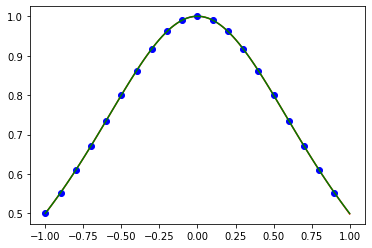

In [13]:
import numpy as np
import matplotlib.pyplot as plt
pn=[]
x=np.arange(-1,1,0.1)
f= lambda x:1/(1+x**2)
y=f(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pn.append(pr(x,y,t[i]))
plt.plot(t,pn,"r",x,y,"bo",t,f(t),"g")
plt.show()

4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

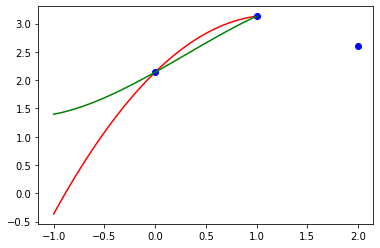

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
pt=[]
x=np.arange(0,3)
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f_2=np.vectorize(f)
y=f_2(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pt.append(pr(x,y,t[i]))
plt.plot(t,pt,"r",x,y,"bo",t,f_2(t),"g")
plt.show()

2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

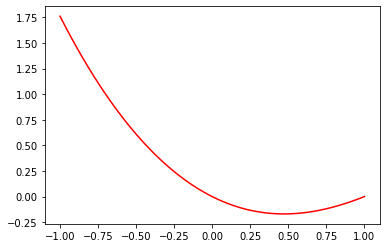

In [23]:
plt.plot(t,f_2(t)-pt,"r")
plt.show()

<font size="4"><font color="red">cette courbe d'erreur a une allure  exponentielle en fonction de n

## <p style="color:#028A93">Exercice 2 ( Phenomène de Runge ):</p> 

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

Text(0.5, 1.0, 'Interpolation Equidistante avec N=10')

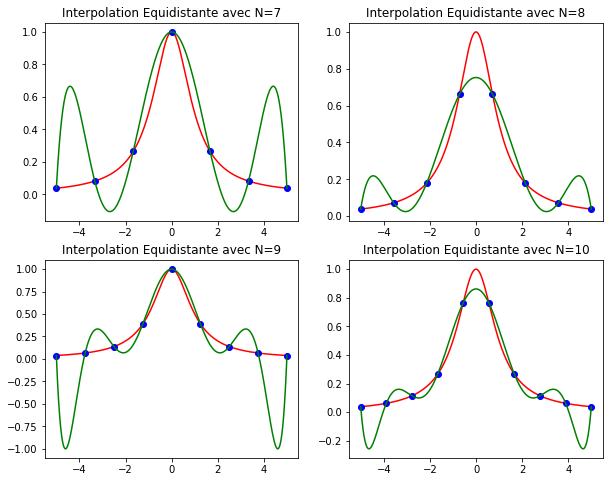

In [24]:
N=7
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
fig=plt.figure(1,figsize=(10,8))
Y=[f(i) for i in X]
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)
k=np.polyval(p,t)
plt.plot(t,f(t),'r',X,Y,'ob', t,k,'g')
plt.title('Interpolation Equidistante avec N=7')
##############################
##############################
N=8
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2);
Y=[f(i) for i in X]
p=np.polyfit(X,Y,N-1)
plt.subplot(2,2,2)
k=np.polyval(p,t)
plt.plot(t,f(t),'r',X,Y,'ob', t,k,'g')
plt.title('Interpolation Equidistante avec N=8')
##############################
N=9
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2);
Y=[f(i) for i in X]
p=np.polyfit(X,Y,N-1)
plt.subplot(2,2,3)
k=np.polyval(p,t)
plt.plot(t,f(t),'r',X,Y,'ob', t,k,'g')
plt.title('Interpolation Equidistante avec N=9')
##############################
N=10
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2);
Y=[f(i) for i in X]
p=np.polyfit(X,Y,N-1)
plt.subplot(2,2,4)
k=np.polyval(p,t)
plt.plot(t,f(t),'r',X,Y,'ob', t,k,'g')
plt.title('Interpolation Equidistante avec N=10')

<font size="4"><font color="red">En regardant ces courbes , on peut constater que  le polynôme approche  du F si
   N augmente.

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [25]:
from math import *
def tcheb(a,b,n):
    V=[]
    for k in range(n):
        V.append((a+b)/2+(a-b)/2*cos((k-1)/(n-1)*pi))
    return V

In [27]:
tcheb(-5,5,11)

[-4.755282581475767,
 -5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=17')

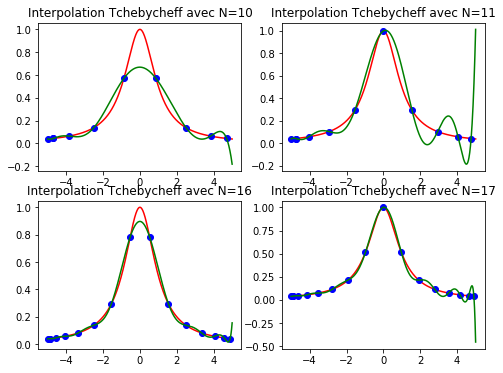

In [30]:

N=10
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N);
Yt=[f(i) for i in Xt]
pt=np.polyfit(Xt,Yt,N-1)
fig=plt.figure(1,figsize=(8,6))
plt.subplot(2,2,1)
k=np.polyval(pt,t)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, k,'g')
plt.title("Interpolation Tchebycheff avec N=10")
###################################################
N=11
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N);
Yt=[f(i) for i in Xt]
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,2)
k=np.polyval(pt,t)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, k,'g')
plt.title("Interpolation Tchebycheff avec N=11")
##########################################################
N=16
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N);
Yt=[f(i) for i in Xt]
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,3)
k=np.polyval(pt,t)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, k,'g')
plt.title("Interpolation Tchebycheff avec N=16")
##########################################################
N=17
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N);
Yt=[f(i) for i in Xt]
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,4)
k=np.polyval(pt,t)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, k,'g')
plt.title("Interpolation Tchebycheff avec N=17")

<font size="4"><font color="red">En Regardant ces courbes on peut constater que l'interpolation au sens de Tchebychev est  meilleure que l'interpolation aux points équidistants. Mais malheuresement, elle ne résout pas complètement le phénomène de Runge 

## <p style="color:#028A93">Exercice 3:</p> 

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>

In [31]:
def intN(x,y):
    m=len(x)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f

In [32]:
x=[-1,0,2,5]
y=[6,1,3,66]
intN(x,y)

array([ 0.        , -5.        ,  0.66666667, 10.5       ])

In [33]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p

In [34]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
intNval(x,y,t)

array([   7., -118.,   27.,  838.])

## Calcul a la main

2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

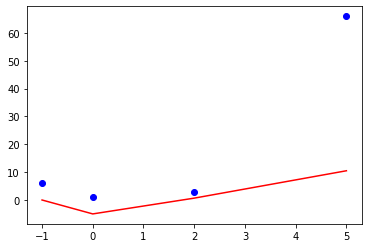

In [35]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)
plt.plot(x,f,'r',x,y,'ob')
plt.show()

3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).

In [37]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[0]

7.0

##  Conclusion

>En analyse numérique (et dans son application algorithmique discrète pour le calcul numérique), l'interpolation est une opération mathématique permettant de remplacer une courbe ou une fonction par une autre courbe (ou fonction) plus simple, mais qui coïncide avec la première en un nombre fini de points (ou de valeurs) donnés au départ.